# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Cities list from citipy library

lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Data Retrieval

url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}&q={city}"
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count += 1

    try:
      
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | labytnangi
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | el granada
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | tazacorte
Processing Record 8 of Set 1 | chhor
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | chonchi
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | salem
Processing Record 20 of Set 1 | kulia village
City not found. Skipping...
Processing Record 21 of Set 1 | st. john's
Processing Record 22

In [18]:
# Converting data into Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [19]:
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706660352
1,labytnangi,66.6572,66.4183,-16.08,97,100,2.47,RU,1706660353
2,edinburgh of the seven seas,-37.0676,-12.3116,14.05,58,72,2.67,SH,1706660353
3,adamstown,-25.0660,-130.1015,24.74,78,100,13.28,PN,1706660353
4,el granada,37.5027,-122.4694,19.82,71,20,4.63,US,1706660353


In [76]:
# Export data into csv

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706660352
1,labytnangi,66.6572,66.4183,-16.08,97,100,2.47,RU,1706660353
2,edinburgh of the seven seas,-37.0676,-12.3116,14.05,58,72,2.67,SH,1706660353
3,adamstown,-25.0660,-130.1015,24.74,78,100,13.28,PN,1706660353
4,el granada,37.5027,-122.4694,19.82,71,20,4.63,US,1706660353


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

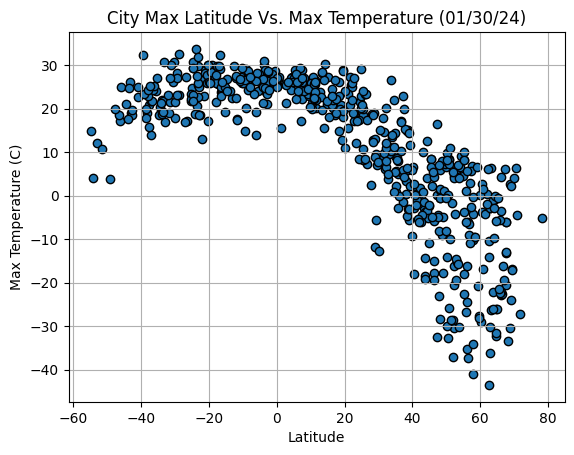

In [29]:
# Latitude vs. Temperature Scatter Plot

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", label="Cities")

plt.title("City Max Latitude Vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

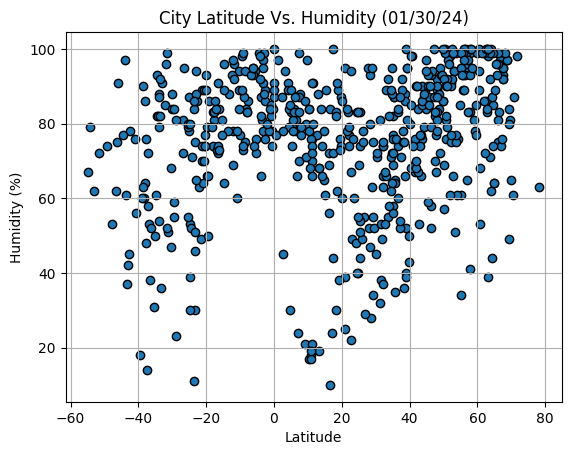

In [30]:
# Latitude vs. Humidity Scatter Plot

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", label="Cities")

plt.title("City Latitude Vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

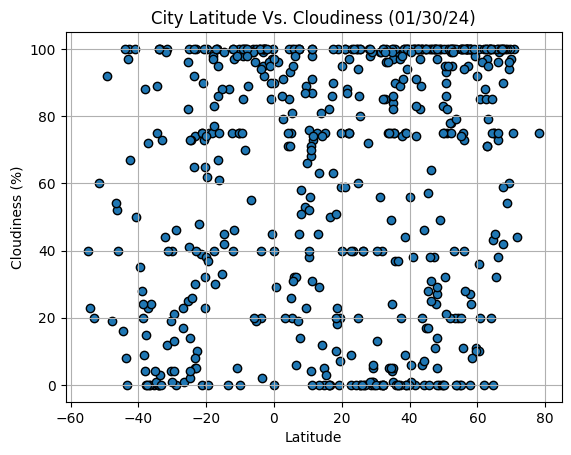

In [31]:
# Latitude vs. Cloudiness Scatter Plot

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", label="Cities")

plt.title("City Latitude Vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

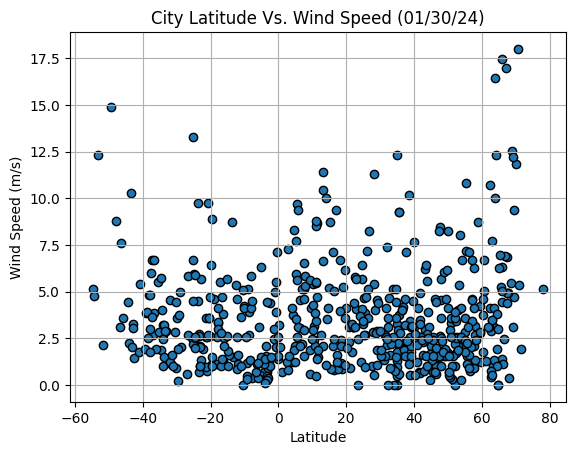

In [32]:
# Latitude vs. Wind Speed Scatter Plot

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", label="Cities")

plt.title("City Latitude Vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots

def lin_regress_plot(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [56]:
# Northern Hemisphere DataFrame

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,labytnangi,66.6572,66.4183,-16.08,97,100,2.47,RU,1706660353
4,el granada,37.5027,-122.4694,19.82,71,20,4.63,US,1706660353
5,praia da vitoria,38.7333,-27.0667,15.14,88,75,3.41,PT,1706660354
6,tazacorte,28.6290,-17.9293,18.97,28,0,4.02,ES,1706660354
7,chhor,25.5167,69.7667,18.62,74,100,3.84,PK,1706660354


In [57]:
# Southern Hemisphere DataFrame

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,26.99,78,40,2.57,CC,1706660352
2,edinburgh of the seven seas,-37.0676,-12.3116,14.05,58,72,2.67,SH,1706660353
3,adamstown,-25.0660,-130.1015,24.74,78,100,13.28,PN,1706660353
8,blackmans bay,-43.0167,147.3167,19.07,42,97,3.24,AU,1706660354
9,punta arenas,-53.1500,-70.9167,12.06,62,20,12.35,CL,1706660354


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8006795866844338


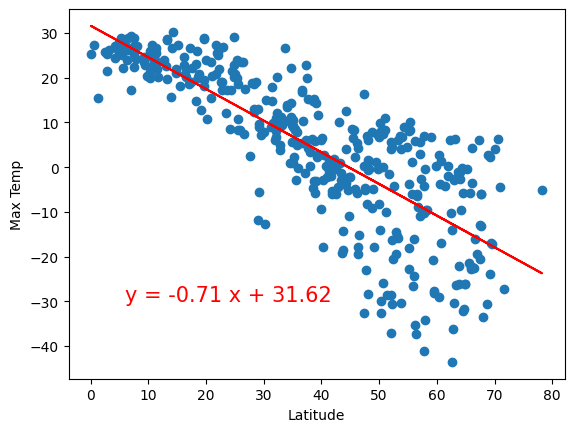

In [60]:
# Northern hemisphere: Latitude vs. Temperature linear regression plot

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
lin_regress_plot(x_values,y_values, 'Max Temp', (6,-30))

The r-value is: 0.46229929090594585


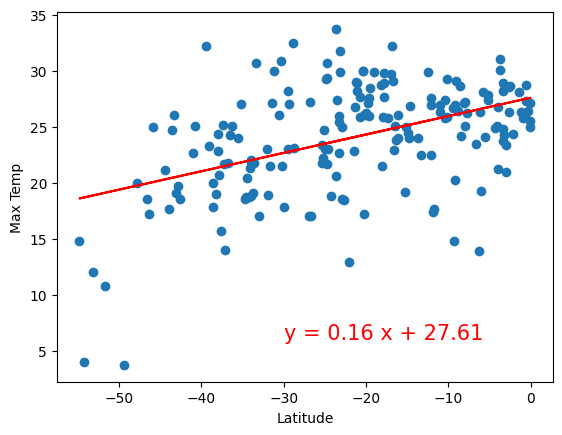

In [61]:
# Southern hemisphere: Latitude vs. Temperature linear regression plot

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
lin_regress_plot(x_values,y_values, 'Max Temp', (-30,6))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32426723725082823


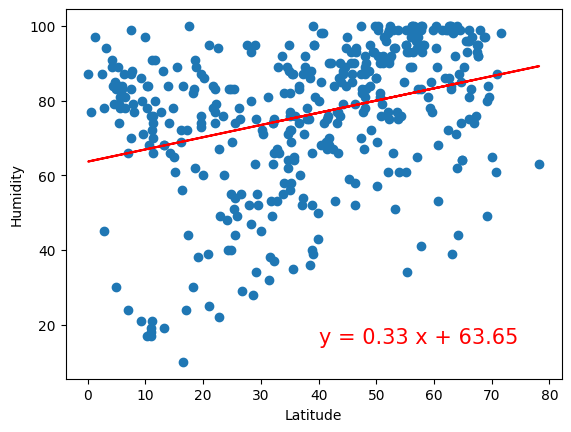

In [63]:
# Northern hemisphere: Latitude vs. Humidity linear regression plot

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
lin_regress_plot(x_values,y_values, 'Humidity', (40,15))

The r-value is: 0.4361483040588963


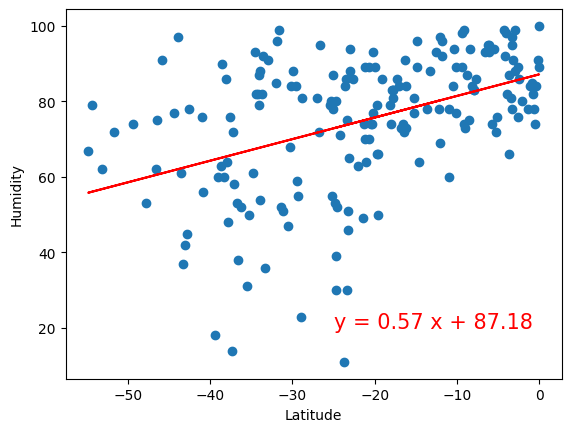

In [66]:
# Southern hemisphere: Latitude vs. Humidity linear regression plot

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
lin_regress_plot(x_values,y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15075796090917135


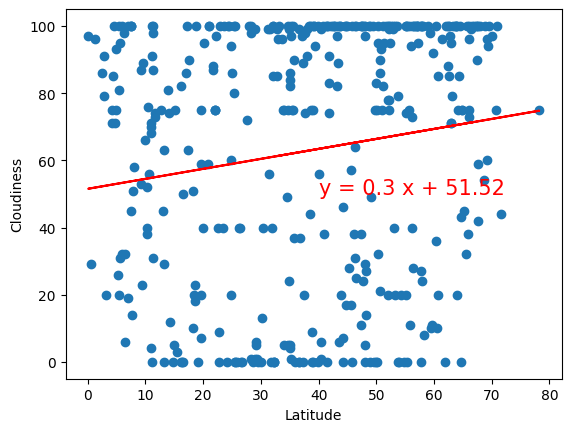

In [68]:
# Northern hemisphere: Latitude vs. Cloudiness linear regression plot

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
lin_regress_plot(x_values,y_values, 'Cloudiness', (40,50))

The r-value is: 0.4251542668721907


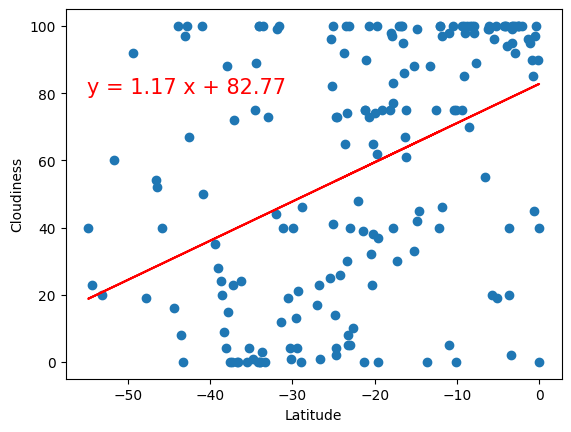

In [70]:
# Southern hemisphere: Latitude vs. Cloudiness linear regression plot

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
lin_regress_plot(x_values,y_values, 'Cloudiness', (-55,80))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06219765424630455


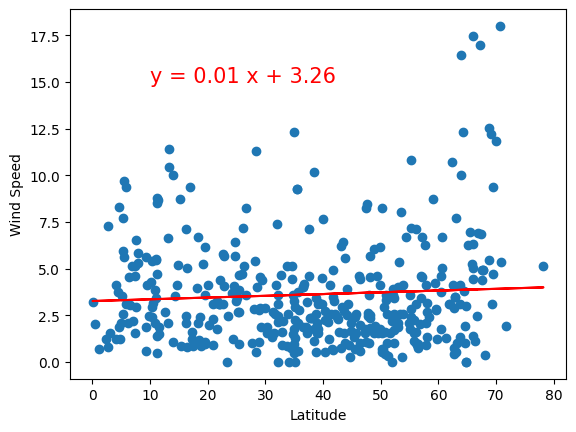

In [72]:
# Northern hemisphere: Latitude vs. Wind Speed linear regression plot

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
lin_regress_plot(x_values,y_values, 'Wind Speed', (10,15))

The r-value is: -0.31706037873112114


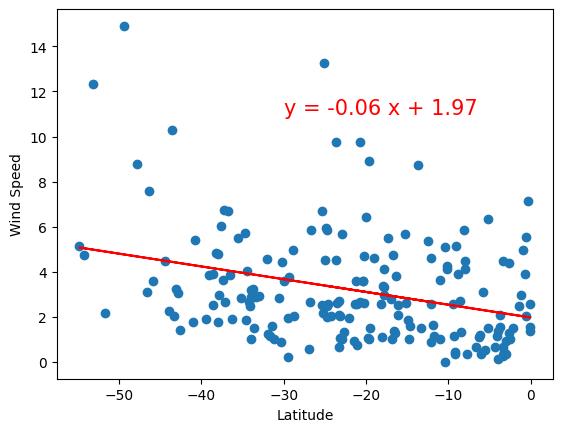

In [75]:
# Southern hemisphere: Latitude vs. Wind Speed linear regression plot

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
lin_regress_plot(x_values,y_values, 'Wind Speed', (-30,11))